# 데이터셋 출처

## 데이터 구성
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedireeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 필요한 라이브러리 로드

In [67]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz/bin/'

%matplotlib inline

# 데이터셋 로드

In [8]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 학습, 예측 데이터셋 나누기

In [13]:
# 8:2의 비율로 구하기 위해 전체 데이터 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담는다.
# split_count
split_count = int(df.shape[0] * 0.8)
split_count

614

In [21]:
# train, test로 슬라이싱을 통해 데이터를 나눈다.
train = df[:split_count].copy()
train.shape

(614, 9)

In [25]:
test = df[split_count:].copy()
test.shape

(154, 9)

# 학습, 예측에 사용할 컬럼

In [29]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 정답값이자 예측해야 될 값

In [31]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.
label_name = train.columns[-1]
label_name

'Outcome'

# 학습, 예측 데이터셋 만들기

In [35]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [37]:
# 정답 값을 만들기 예) 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [39]:
# 예측에 사용할 데이터세트를 만들기 예) 실전 시험 문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [42]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [47]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

# 학습(훈련)
- 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사하다.

In [50]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# 예측
- 실전 시험문제(X_test)라고 보면 된다. 우리가 정답을 직접 예측한다.

In [53]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

# 트리 알고리즘 분석하기
- 의사결정나무를 시각화 한다.

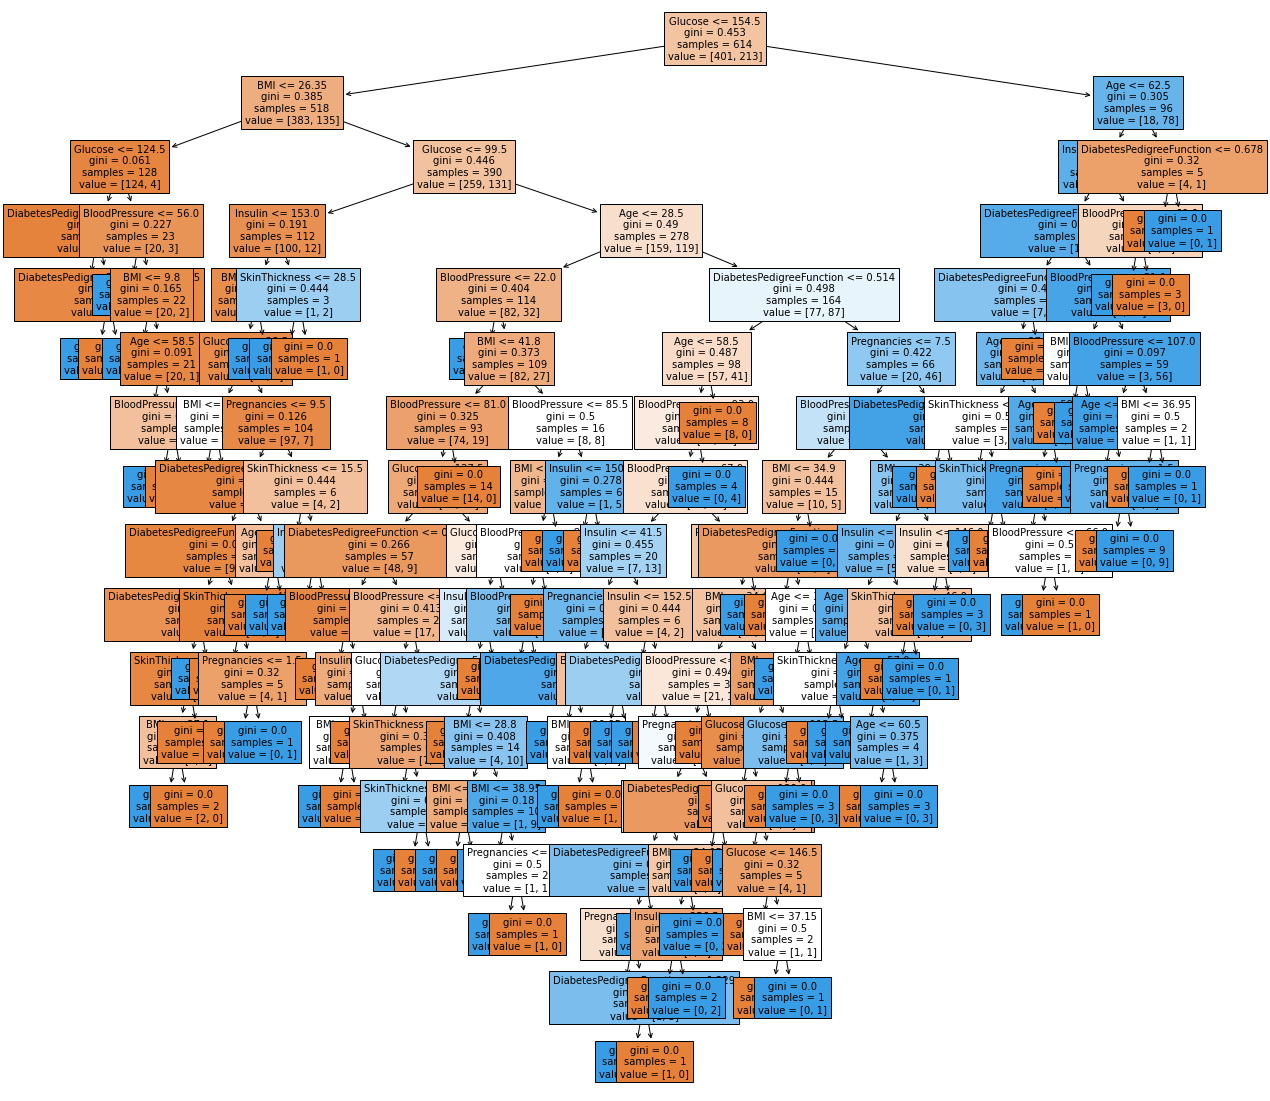

In [59]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))

tree = plot_tree(model,
                 feature_names=feature_names,
                 filled = True,
                 fontsize=10)

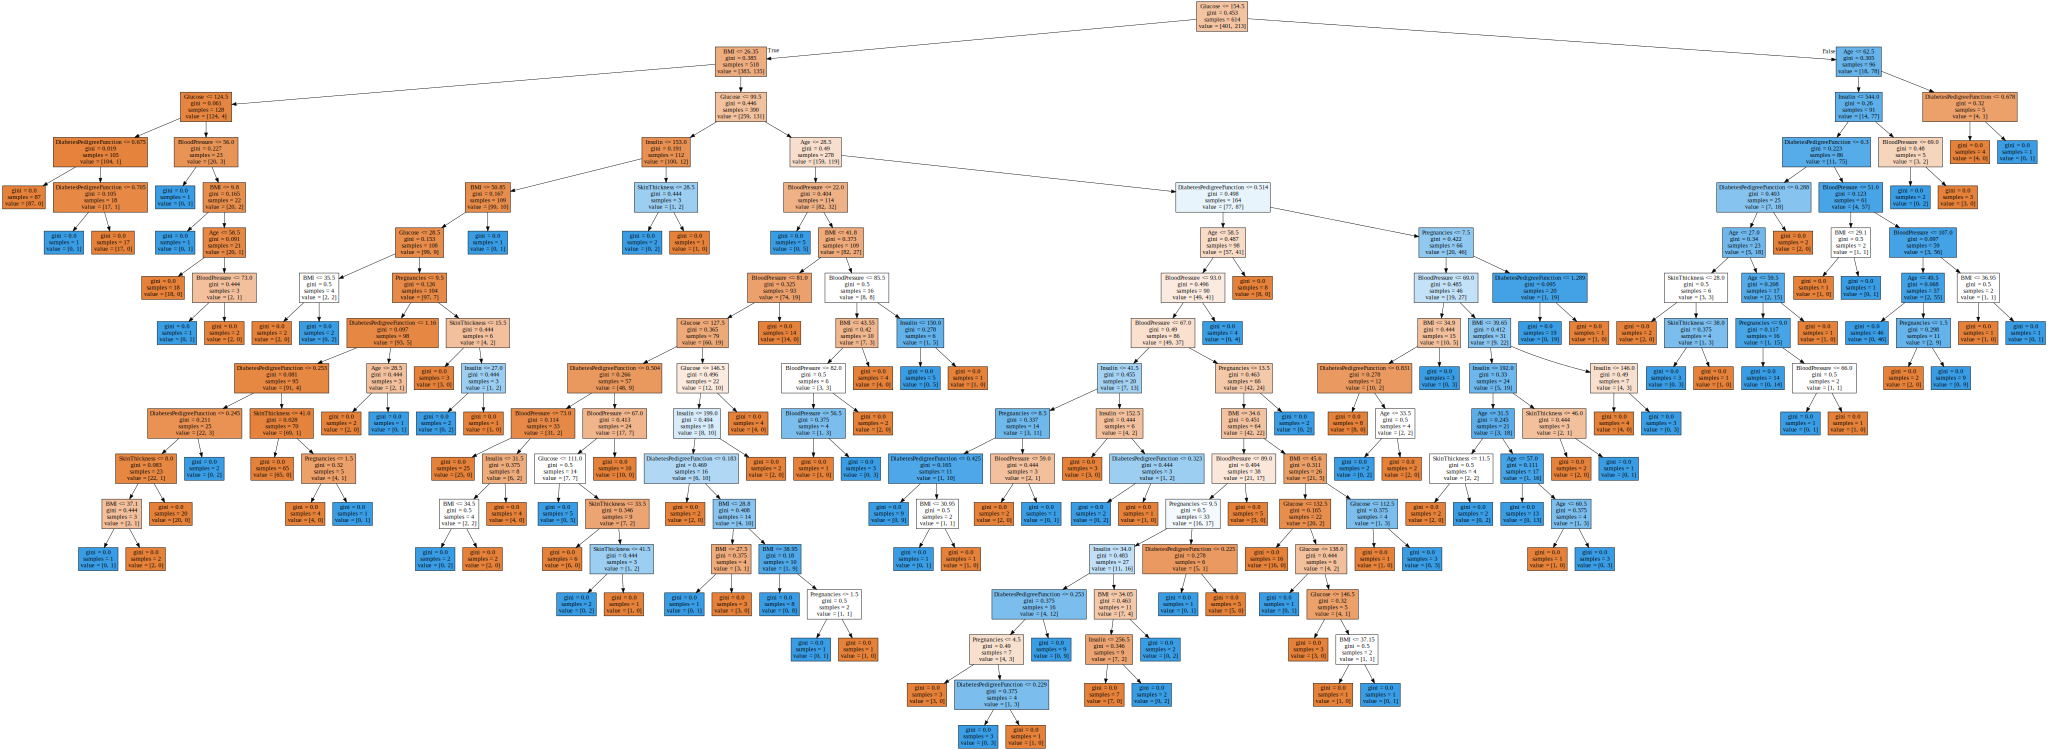

In [71]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                 feature_names = feature_names,
                 filled = True)
graphviz.Source(dot_tree)

In [72]:
# 피처의 중요도를 추출하기
model.feature_importances_

array([0.06565471, 0.28974458, 0.12589098, 0.04694965, 0.08052642,
       0.18191199, 0.11592432, 0.09339735])

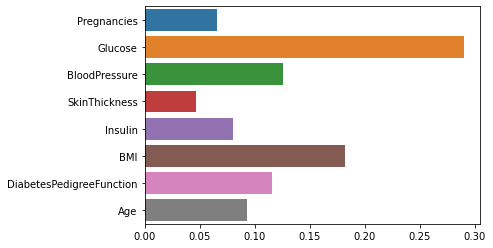

In [73]:
# 피처의 중요도 시각화 하기
sns.barplot(x = model.feature_importances_, y = feature_names)

# 정확도(Accuracy) 측정하기

In [77]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 된다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.

diff_count = abs(y_test - y_predict).sum()
diff_count

43

In [79]:
# 예측의 정확도를 구한다, 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 된다.

(len(y_test) - diff_count) / len(y_test) * 100

72.07792207792207

In [80]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용한다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

72.07792207792207

In [81]:
# model의 score로 점수를 계산한다.
model.score(X_test, y_test) * 100

72.07792207792207